In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight") 

In [2]:
# load the data set
df = pd.read_csv ("F:\codegnan\projects\Rainfall.csv")

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\91949\AppData\Local\Temp\ipykernel_8740\881950086.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv ("F:\codegnan\projects\Rainfall.csv")


In [3]:
# head of the data
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
# Binary classification of a rain fall
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [5]:
# to know what type of datatype.
df.shape

(366, 12)

In [6]:
# machine learning model -> ml flow -> flask 
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
# to know what type of data is present in a dataset in a Transfomative way..
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [10]:
# Remove the spaces in a dataset columns.
df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
# removing the day column because every month the days are changed.
df= df.drop(columns=['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [14]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [15]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [16]:
df['winddirection'].mode()[0]

np.float64(20.0)

In [17]:
df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [18]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [19]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [20]:
df['rainfall'].unique()


array(['yes', 'no'], dtype=object)

In [21]:
df['rainfall'] = df['rainfall'].map({"yes" : 1, "no" : 0})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [23]:
# EDA

df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

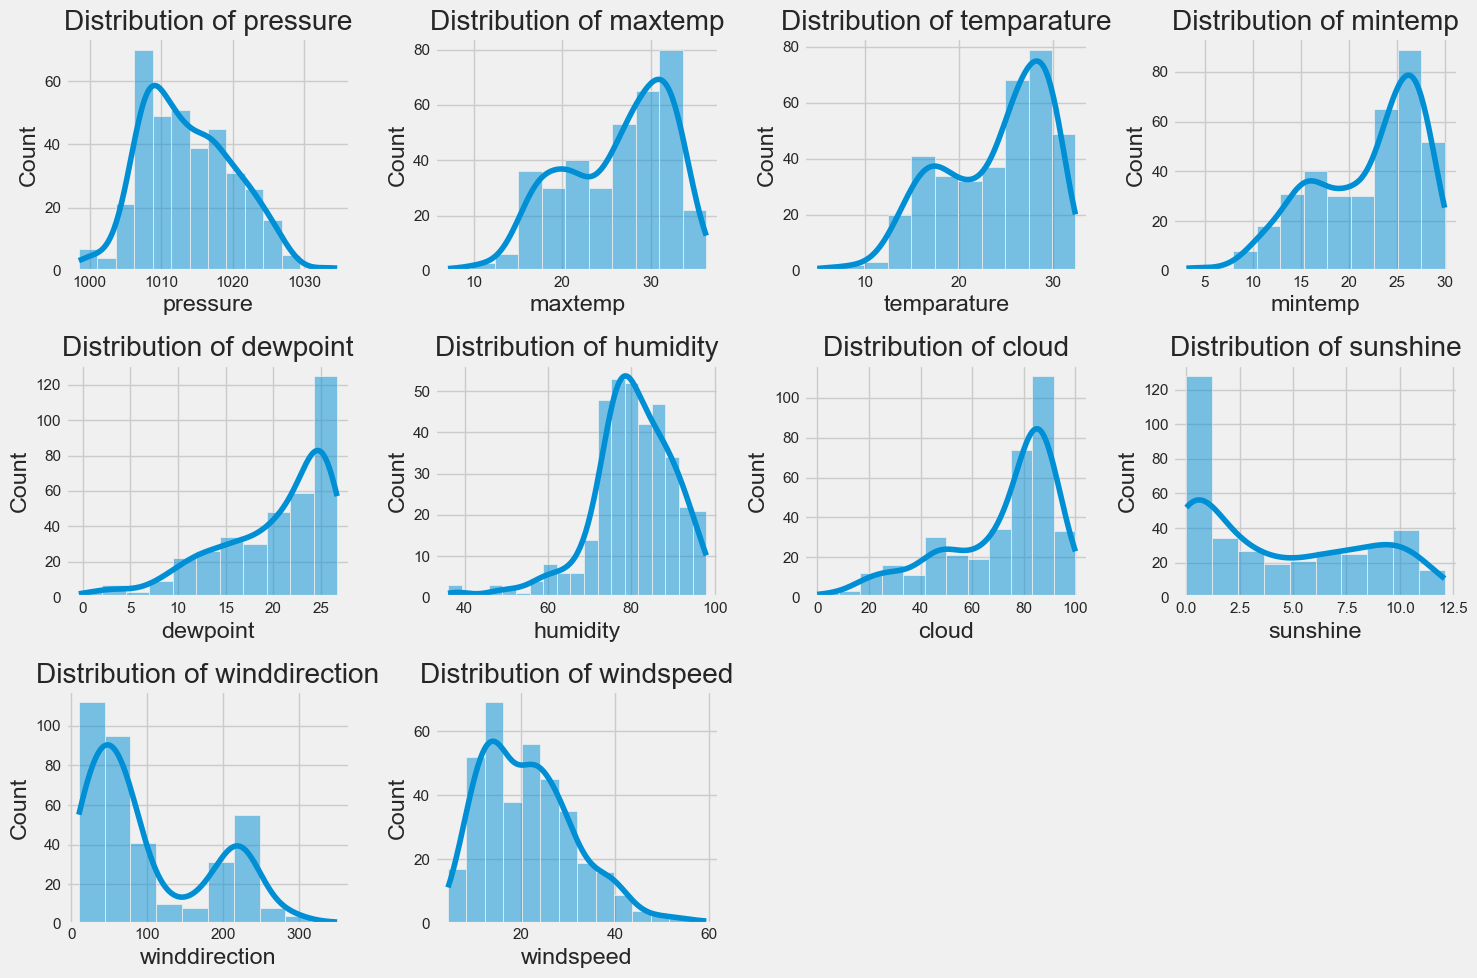

In [24]:
# To see the distribution of a data in a columns
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud','sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column],kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

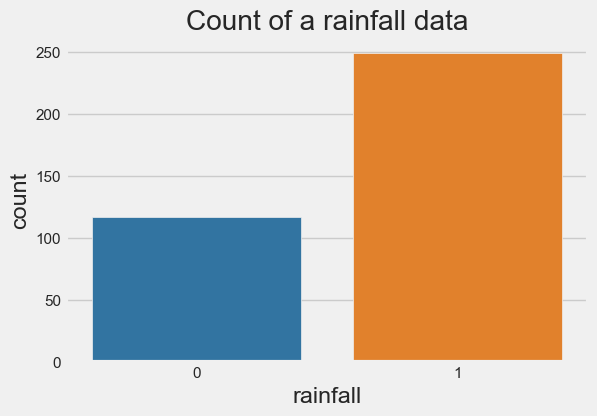

In [25]:
plt.figure(figsize = (6, 4))
sns.countplot(x="rainfall", hue="rainfall", data=df, palette=['#1f77b4', '#ff7f0e'], legend=False)
plt.title("Count of a rainfall data")
plt.show()


Handling the missing value

categorical  -> numerical  -> just like rainfall , using map method
kde  -> 
data is imbalance or not   -> SMOTE (oversample , undersample)
Feature engine -> correaltion
Outlier  -> boxplot (we use this plot)

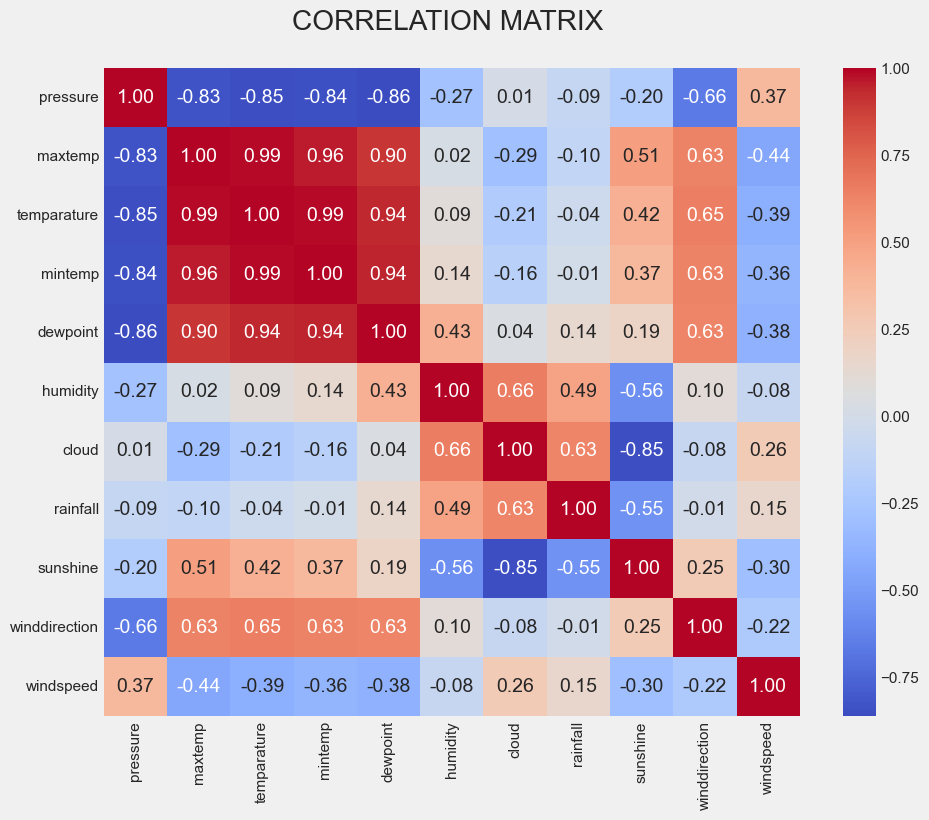

In [26]:
# Feature extraction of a Data
plt.figure(figsize =(10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("CORRELATION MATRIX \n")
plt.show()

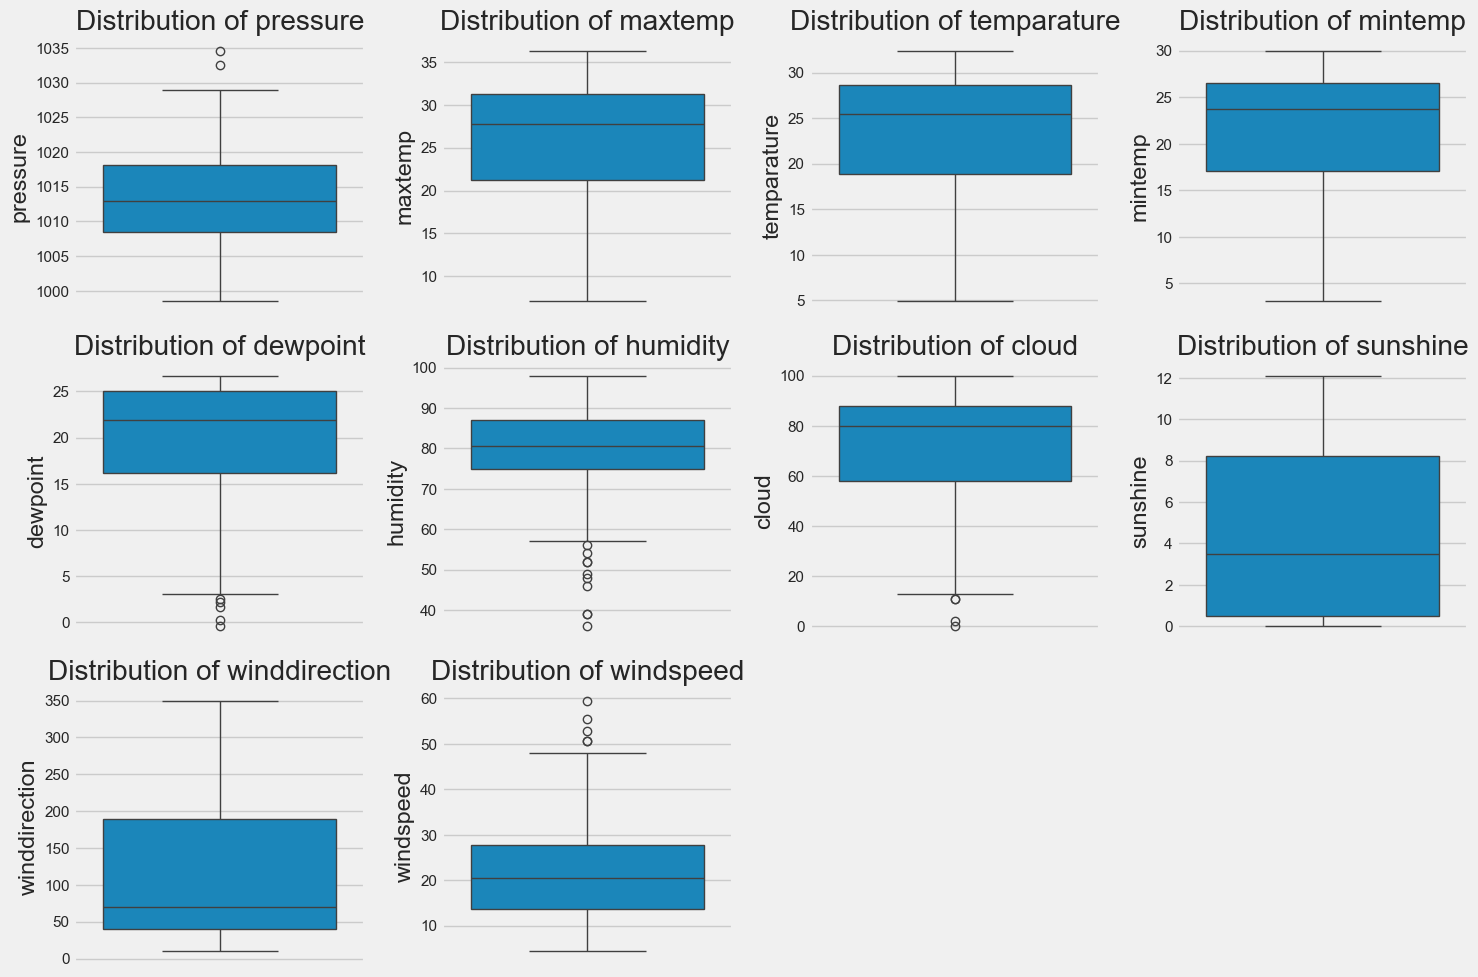

In [27]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud','sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [28]:
df = df.drop(columns = ['maxtemp', 'temparature', 'mintemp'])


In [29]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [30]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [31]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [32]:
downsample_indices = np.random.choice(df_majority.index, size = len(df_minority), replace=False)
df_majority_downsampled = df_majority.loc[downsample_indices]

In [33]:
df_majority_downsampled.shape

(117, 8)

In [34]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop=True)
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [35]:
#Model building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [36]:
X = df_downsampled.drop(columns = ['rainfall'])
y = df_downsampled['rainfall']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200], 
    "max_features":['sqrt', 'log2'],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [39]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [40]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
grid_search_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [42]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
cv_scores

array([0.68421053, 0.84210526, 0.81081081, 0.75675676, 0.89189189])

In [43]:
np.mean(cv_scores)

np.float64(0.7971550497866288)

In [44]:
y_pred = best_rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6595744680851063

In [45]:
confusion_matrix(y_test, y_pred)

array([[14, 10],
       [ 6, 17]])

In [46]:
report_dict = classification_report(y_test, y_pred, output_dict = True)
report_dict

{'0': {'precision': 0.7,
  'recall': 0.5833333333333334,
  'f1-score': 0.6363636363636364,
  'support': 24.0},
 '1': {'precision': 0.6296296296296297,
  'recall': 0.7391304347826086,
  'f1-score': 0.68,
  'support': 23.0},
 'accuracy': 0.6595744680851063,
 'macro avg': {'precision': 0.6648148148148147,
  'recall': 0.661231884057971,
  'f1-score': 0.6581818181818182,
  'support': 47.0},
 'weighted avg': {'precision': 0.6655634357762017,
  'recall': 0.6595744680851063,
  'f1-score': 0.6577176015473888,
  'support': 47.0}}

Mishu-> DS -> Credit Card Fraud -> notebook 1, notebook 2, notebook 3
Chando-> DS -> notebook 4, notebook 5, notebook 6
Boss -> 

In [47]:
# installing the mlflow.
!pip install mlflow

In [48]:
import mlflow
import mlflow.sklearn

In [50]:
mlflow.set_experiment('Rainfall2')
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run():
    mlflow.log_params(grid_search_rf.best_params_)
    mlflow.log_metrics({
        
        "accuracy":report_dict['accuracy'], 
        "recall_class_0":report_dict['0']['recall'],
        "recall_class_1":report_dict['1']['recall'],
        "f1_score_macro":report_dict['macro avg']['f1-score']
    })
    
    mlflow.sklearn.log_model(best_rf_model, "Random Forest Model Data")

2025/09/14 23:35:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/14 23:35:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run vaunted-hen-583 at: http://127.0.0.1:5000/#/experiments/691534070164453571/runs/a331b5f14b5549d5948be1cb693a2543
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/691534070164453571


In [51]:
model_name = "Random Forest Model Data"
run_id = "72951c111c684c18b37d1b53f9583c1a"
model_uri = f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id = run_id):
    mlflow.register_model(model_uri=model_uri, name = model_name)

Registered model 'Random Forest Model Data' already exists. Creating a new version of this model...
2025/09/14 23:36:01 WARNING mlflow.tracking._model_registry.fluent: Run with id 72951c111c684c18b37d1b53f9583c1a has no artifacts at artifact path 'Random Forest Model Data', registering model based on models:/m-3ced580ea5d64903b582573adc6ae7b3 instead
2025/09/14 23:36:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Model Data, version 4


🏃 View run bedecked-jay-503 at: http://127.0.0.1:5000/#/experiments/691534070164453571/runs/72951c111c684c18b37d1b53f9583c1a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/691534070164453571


Created version '4' of model 'Random Forest Model Data'.


In [52]:
import mlflow
logged_model = 'runs:/72951c111c684c18b37d1b53f9583c1a/Random Forest Model Data'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)

loaded_model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0])

In [53]:
logged_model

'runs:/72951c111c684c18b37d1b53f9583c1a/Random Forest Model Data'

In [54]:
loaded_model

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = 'rainfall-prediction-production'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri = current_model_uri, dst_name = production_model_name)

Successfully registered model 'rainfall-prediction-production'.
Copied version '4' of model 'Random Forest Model Data' to version '1' of model 'rainfall-prediction-production'.


<ModelVersion: aliases=[], creation_timestamp=1757874020233, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1757874020233, metrics=None, model_id=None, name='rainfall-prediction-production', params=None, run_id='72951c111c684c18b37d1b53f9583c1a', run_link='', source='models:/Random Forest Model Data/4', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [59]:
model_version = 1
prod_model_uri = f'models:/{production_model_name}@champion'

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)

In [60]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0])

In [64]:
# Predictive System

input_df = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_df], ['pressure','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])

In [65]:
prediction = loaded_model.predict(input_df)

C:\Users\91949\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
prediction

array([1, 1, 1, 1, 1, 1, 1])

In [68]:
print("Prediction Result: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result:  Rainfall


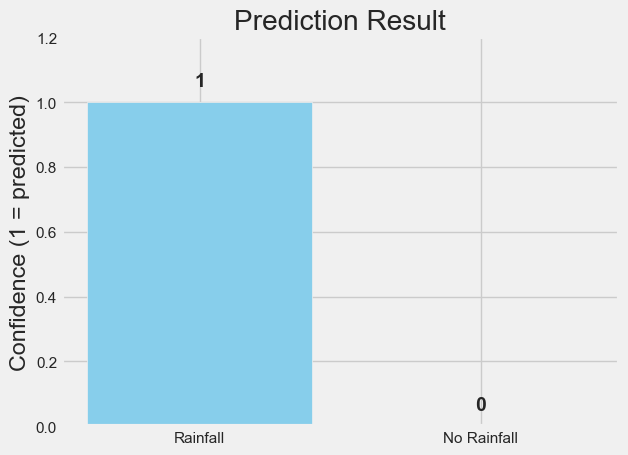

In [70]:

# Example prediction result
prediction = [1]  # Change this to 0 or 1 depending on your model's output

# Define labels and values
labels = ['Rainfall', 'No Rainfall']
values = [1, 0] if prediction[0] == 1 else [0, 1]

# Plotting
plt.bar(labels, values, color=['skyblue', 'gray'])
plt.title('Prediction Result')
plt.ylabel('Confidence (1 = predicted)')
plt.ylim(0, 1.2)

# Add text labels above bars
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(v), ha='center', fontweight='bold')

plt.show()
